## Observation and Insight 

In [163]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
Mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
Mouse_metadata = pd.read_csv(Mouse_metadata_path)
Mouse_metadata.head()



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [164]:
# Read the Study Results.
study_results = pd.read_csv(study_results_path)
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [165]:
# Combine the Data into a Single Dataset.
combine_data = pd.merge(Mouse_metadata, study_results, how='outer', on='Mouse ID')

# Display the Data Table for Preview
combine_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [166]:
# Checking the Number of Mice.
mice_number = combine_data["Mouse ID"].nunique()
mice_number


249

In [167]:
# Getting the Duplicate Mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice_id = combine_data.loc[combine_data.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
dup_mice_id

array(['g989'], dtype=object)

In [168]:
# Optional: Get all the Data for the Duplicate Mouse ID. 
dup_mouse = combine_data.loc[combine_data["Mouse ID"] =="g989", :]
dup_mouse



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [169]:
# Create a Clean DataFrame by dropping the Duplicate Mouse by its ID.
clean_df = combine_data[combine_data['Mouse ID'].isin(dup_mice_id) ==False]
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [170]:
# Checking the Number of Mice in the Clean DataFrame.
mice_in_clndf = clean_df["Mouse ID"].nunique()
mice_in_clndf

248

## Summary Statistics

In [171]:
# Generate a Summary Statistics Table of Mean, Median, Variance, Standard Deviation, and SEM of the Tumor Volume for each Regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mean = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).mean()
median = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).median()
var = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).var()
std = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).std()
sem = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).sem()
summary_stat = pd.DataFrame({"Mean Tumor Volume":mean,
                            "Median Tumor Volume":median,
                           "Tumor Volume Variance":var,
                           "Tumor Volume Std. Dev.":std,
                           "Tumor Volume Std. Err.":sem})
summary_stat

    


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [172]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
sum_agg_method = clean_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean',  'var', 'std', 'sem'])
sum_agg_method                                                     

Tumor Volume (mm3)                               
                           mean        var       std       sem
Drug Regimen                                                  
Capomulin             40.675741  24.947764  4.994774  0.329346
Ceftamin              52.591172  39.290177  6.268188  0.469821
Infubinol             52.884795  43.128684  6.567243  0.492236
Ketapril              55.235638  68.553577  8.279709  0.603860
Naftisol              54.331565  66.173479  8.134708  0.596466
Placebo               54.033581  61.168083  7.821003  0.581331
Propriva              52.320930  43.852013  6.622085  0.544332
Ramicane              40.216745  23.486704  4.846308  0.320955
Stelasyn              54.233149  59.450562  7.710419  0.573111
Zoniferol             53.236507  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [173]:
count_mice = clean_df["Drug Regimen"].value_counts()
count_mice

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

Text(0.5, 1.0, 'Number of Mice Tested per Treatment')

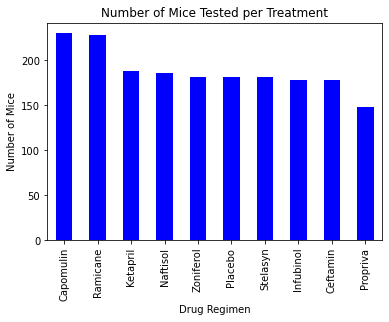

In [174]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
pandas_plot = count_mice.plot.bar(color='b')

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice Tested per Treatment")



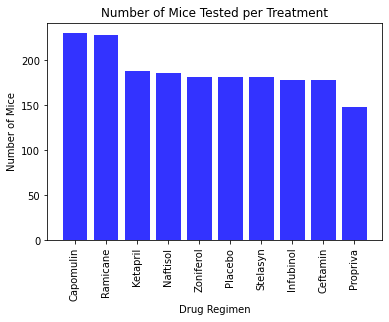

In [175]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = count_mice.index.values
y_axis = count_mice.values

plt.bar(x_axis, y_axis, color='b', alpha=0.8, align='center')
plt.title("Number of Mice Tested per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.xticks(rotation="vertical")

plt.show()




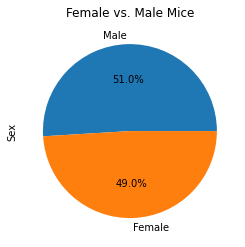

In [176]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas.
gen_data = clean_df["Sex"].value_counts()
plt.title("Female vs. Male Mice")
gen_data.plot.pie(autopct= "%1.1f%%")
plt.show()



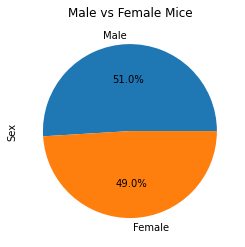

In [177]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot.
labels = ['Female', 'Male']
sizes = [49.7999197, 50.200803]
plot = gen_data.plot.pie(y='Total Count', autopct="%1.1f%%")
plt.title('Male vs Female Mice')
plt.show()


## Quartiles, Outliers and Boxplots

In [178]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [179]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [180]:
Capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]
Ramicane_df = clean_df.loc[clean_df["Drug Regimen"] == "Ramicane", :]
Infubinol_df = clean_df.loc[clean_df["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = clean_df.loc[clean_df["Drug Regimen"] == "Ceftamin", :]



In [181]:
Cap_last = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
Cap_vol = pd.DataFrame(Capomulin_last)
Cap_merge = pd.merge(Capomulin_vol, clean_df, on=("Mouse ID","Timepoint"),how="left")
Cap_merge.head()
Cap_tumor_vol = Capomulin_merge["Tumor Volume (mm3)"]

quartiles =Capomulin_tumor_vol.quantile([.25,.5,.75]).round(2)
lowerq = quartiles[0.25].round(2)
upperq = quartiles[0.75].round(2)
iqr = round(upperq-lowerq, 2)


print(f"The lower quartile of Capomulin tumors: {lowerq}")
print(f"The upper quartile of Capomulin tumors: {upperq}")
print(f"The IQR of Capomulin tumors: {iqr}")
print(f"The median of Capomulin tumors: {quartiles[0.5]} ")

lower_bound = round(lowerq - (1.5*iqr), 2)
upper_bound = round(upperq + (1.5*iqr), 2)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower quartile of Capomulin tumors: 32.38
The upper quartile of Capomulin tumors: 40.16
The IQR of Capomulin tumors: 7.78
The median of Capomulin tumors: 38.13 
Values below 20.71 could be outliers.
Values above 51.83 could be outliers.


In [182]:
Rami_last = Ramicane_df.groupby('Mouse ID').max()['Timepoint']
Rami_vol = pd.DataFrame(Ramicane_last)
Rami_merge = pd.merge(Ramicane_vol, clean_df, on=("Mouse ID","Timepoint"),how="left")
Rami_merge.head()
Rami_merge.to_csv("output.csv")
Rami_tumor_vol = Ramicane_merge["Tumor Volume (mm3)"]

quartiles =Ramicane_tumor_vol.quantile([.25,.5,.75]).round(2)
lowerq = quartiles[0.25].round(2)
upperq = quartiles[0.75].round(2)
iqr = round(upperq-lowerq, 2)


print(f"The lower quartile of Ramicane tumors is: {lowerq}")
print(f"The upper quartile of Ramicane tumors is: {upperq}")
print(f"The IQR of Ramicane tumors is: {iqr}")
print(f"The median of Ramicane tumors is: {quartiles[0.5]} ")

lower_bound = round(lowerq - (1.5*iqr), 2)
upper_bound = round(upperq + (1.5*iqr), 2)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower quartile of Ramicane tumors is: 31.56
The upper quartile of Ramicane tumors is: 40.66
The IQR of Ramicane tumors is: 9.1
The median of Ramicane tumors is: 36.56 
Values below 17.91 could be outliers.
Values above 54.31 could be outliers.


In [183]:
Infub_last = Infubinol_df.groupby('Mouse ID').max()['Timepoint']
Infub_vol = pd.DataFrame(Infubinol_last)
Infub_merge = pd.merge(Infubinol_vol, clean_df, on=("Mouse ID","Timepoint"),how="left")
Infub_merge.head()
Infub_tumor_vol = Infubinol_merge["Tumor Volume (mm3)"]

quartiles =Infubinol_tumor_vol.quantile([.25,.5,.75]).round(2)
lowerq = round(quartiles[0.25], 2)
upperq = round(quartiles[0.75], 2)
iqr = round(upperq-lowerq, 2)


print(f"The lower quartile of Infubinol tumors is: {lowerq}")
print(f"The upper quartile of Infubinol tumors is: {upperq}")
print(f"The IQR of Infubinol tumors is: {iqr}")
print(f"The median of Infubinol tumors is: {quartiles[0.5]} ")

lower_bound = round(lowerq - (1.5*iqr), 2)
upper_bound = round(upperq + (1.5*iqr), 2)


print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
Infubinol_merge.to_csv("output.csv")


The lower quartile of Infubinol tumors is: 54.05
The upper quartile of Infubinol tumors is: 65.53
The IQR of Infubinol tumors is: 11.48
The median of Infubinol tumors is: 60.17 
Values below 36.83 could be outliers.
Values above 82.75 could be outliers.


In [184]:
Ceft_last = Ceftamin_df.groupby('Mouse ID').max()['Timepoint']
Ceft_vol = pd.DataFrame(Ceftamin_last)
Ceft_merge = pd.merge(Ceftamin_vol, clean_df, on=("Mouse ID","Timepoint"),how="left")
Ceft_merge.head()
Ceft_tumor_vol = Ceftamin_merge["Tumor Volume (mm3)"]

quartiles =Infubinol_tumor_vol.quantile([.25,.5,.75]).round(2)
lowerq = round(quartiles[0.25], 2)
upperq = round(quartiles[0.75], 2)
iqr = round(upperq-lowerq, 2)

print(f"The lower quartile of treatment is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The IQR of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

# Determine outliers using upper and lower bounds

lower_bound = round(lowerq - (1.5*iqr), 2)
upper_bound = round(upperq + (1.5*iqr), 2)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower quartile of treatment is: 54.05
The upper quartile of temperatures is: 65.53
The IQR of temperatures is: 11.48
The the median of temperatures is: 60.17 
Values below 36.83 could be outliers.
Values above 82.75 could be outliers.


ValueError: Dimensions of labels and X must be compatible

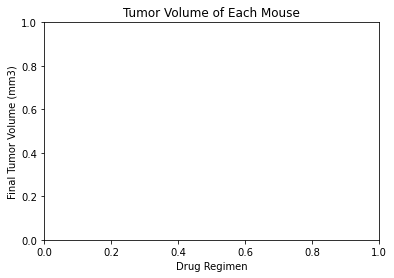

In [185]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

data_to_plot = ['Capomulin, Ramicane, Infubinol, Ceftamin']
data_to_plot
Regimen = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume of Each Mouse')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
ax1.boxplot(data_to_plot, labels=Regimen, widths = 0.3, vert=True)
plt.show()



## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

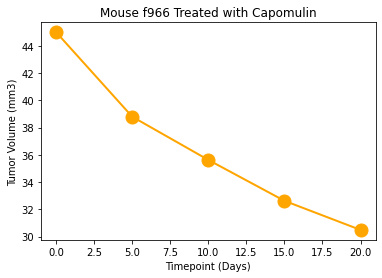

In [186]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
forline_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "f966",:]
forline_df.head()
x_axis = forline_df["Timepoint"]
tumsiz = forline_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Mouse f966 Treated with Capomulin')
plt.plot(x_axis, tumsiz,linewidth=2, markersize=13,marker="o",color="orange", label="Fahrenheit")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')


Text(0, 0.5, 'Averag Tumor Volume (mm3)')

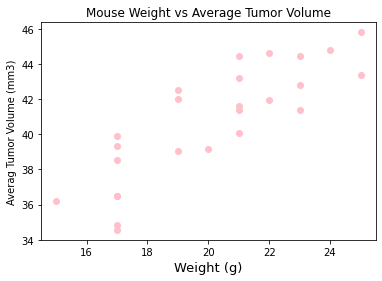

In [187]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
fig1, ax1 = plt.subplots()
avg_capm_vol =Capomulin_df.groupby(['Mouse ID']).mean()

marker_size=15
plt.scatter(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'], color="pink")
plt.title('Mouse Weight vs Average Tumor Volume')
plt.xlabel('Weight (g)',fontsize =13)
plt.ylabel('Averag Tumor Volume (mm3)')


## Correlation and Regression

In [188]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'])
print(f"The correlation coeffecient between mouse weight and the average tumor volume is {round(correlation[0],2)}")


The correlation coeffecient between mouse weight and the average tumor volume is 0.84


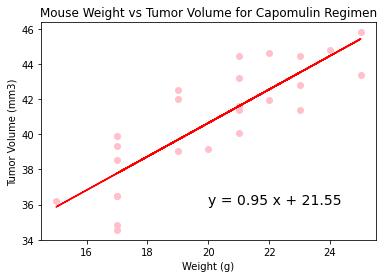

In [189]:
(slope, intercept,rvalue, pvalue, stderr)= linregress(avg_capm_vol["Weight (g)"],avg_capm_vol["Tumor Volume (mm3)"])
regress_values=avg_capm_vol["Weight (g)"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(avg_capm_vol["Weight (g)"],avg_capm_vol["Tumor Volume (mm3)"],color='pink')
plt.plot(avg_capm_vol["Weight (g)"], regress_values, color='red')
plt.annotate(line_eq,(20,36), fontsize=14)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse Weight vs Tumor Volume for Capomulin Regimen")
plt.show()
